Krishna Mathur

Machine Learning Intern

AI Technology and Systems

krishnamathur00@gmail.com

www.ai-techsystems.com

assignment-3 - Compare f1-score and performance of three clustering algorithms on Iris dataset

In [0]:
#importing necessary libraries

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
# importing iris dataset
iris = datasets.load_iris()

In [0]:
#creating list to store f1-score and accuracy
f1_score =[]
accuracy=[]
model =['KNN','Hierarchical','DBSCAN']

# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [84]:
print(x.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Text(0.5, 1.0, 'Petal')

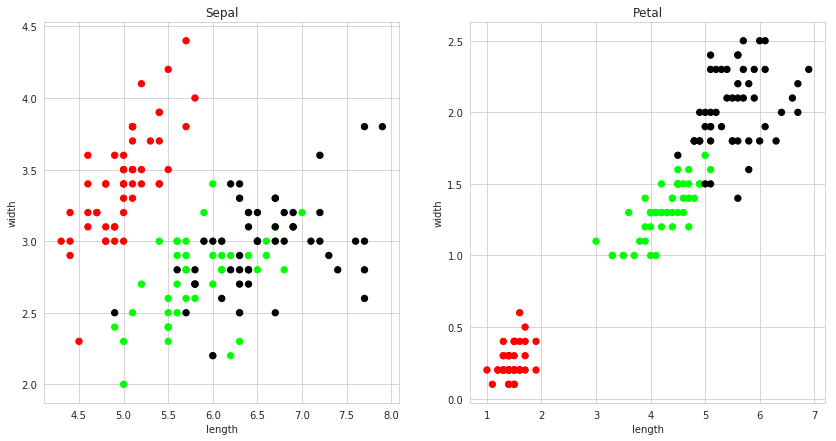

In [85]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.xlabel("length")
plt.ylabel("width")
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.xlabel("length")
plt.ylabel("width")
plt.title('Petal')

In [86]:
# K Means Cluster
kmodel = KMeans(n_clusters=3,random_state=10)
kmodel.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [87]:
# This is what KMeans thought
kmodel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Text(0.5, 1.0, 'K Mean Classification')

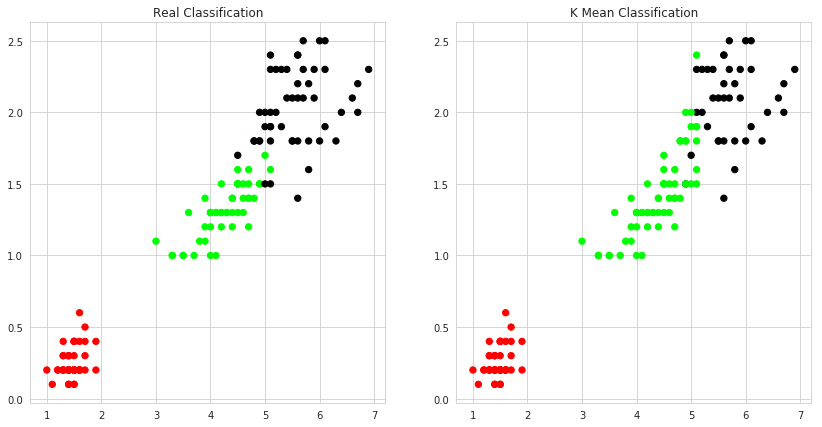

In [88]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[kmodel.labels_], s=40)
plt.title('K Mean Classification')

In [89]:
# Getting accuracy
print(sm.accuracy_score(y, kmodel.labels_))
accuracy.append(sm.accuracy_score(y, kmodel.labels_))


0.8933333333333333


In [90]:
# getting f1_score
print(sm.f1_score(y,kmodel.labels_,average='weighted'))
f1_score.append(sm.f1_score(y,kmodel.labels_,average='weighted'))

0.8917748917748918


# **Hierarchical clustering**

In [0]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale

from pylab import rcParams
import seaborn as sb


In [0]:
np.set_printoptions(precision=4,suppress=True)
rcParams["figure.figsize"] =10,5
sb.set_style("whitegrid")

In [0]:
#scale the data
data = scale(iris.data)
target = pd.DataFrame(iris.target)
variable_names = iris.feature_names

In [0]:
z = linkage(data,"ward")

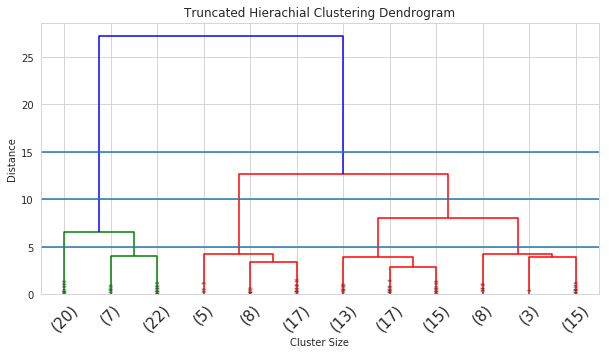

In [95]:
#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [96]:
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="average")
#fit the model on the dataset
HClustering.fit(data)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

Text(0.5, 1.0, 'Hierarchical Classification')

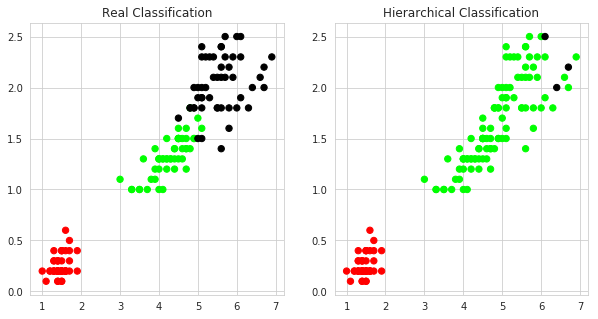

In [97]:
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[HClustering.labels_], s=40)
plt.title('Hierarchical Classification')

In [98]:
#accuracy of the model
print(sm.accuracy_score(target,HClustering.labels_))
accuracy.append(sm.accuracy_score(target,HClustering.labels_))


0.6866666666666666


In [99]:
#getting f1_score
print(sm.f1_score(target,HClustering.labels_,average='weighted'))
f1_score.append(sm.f1_score(target,HClustering.labels_,average='weighted'))

0.5978265520044496


# DBSCAN


In [0]:
from sklearn.cluster import DBSCAN
from collections import  Counter
%matplotlib inline
rcParams['figure.figsize']=10,7
sb.set_style('whitegrid')






In [0]:
dbmodel = DBSCAN(eps = 0.8, min_samples=15).fit(x)


In [102]:
# getting the outliners

outliners_df = pd.DataFrame(x)

print(Counter(dbmodel.labels_))

print(outliners_df[dbmodel.labels_==-1])

Counter({1: 95, 0: 50, -1: 5})
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


Text(0.5, 1.0, 'dbmodel Classification')

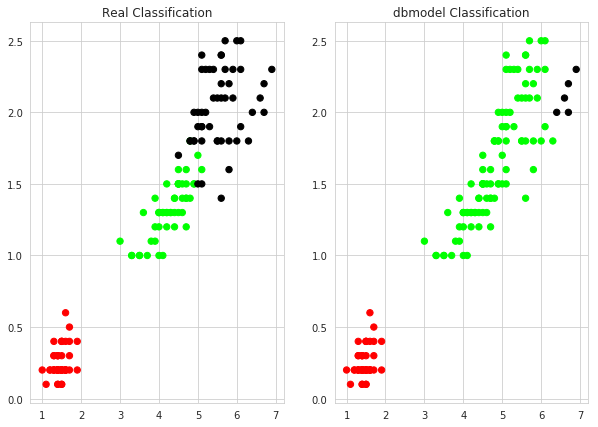

In [103]:
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[dbmodel.labels_], s=40)
plt.title('dbmodel Classification')

In [104]:
#getting accuracy
print(sm.accuracy_score(y,dbmodel.labels_))
accuracy.append(sm.accuracy_score(y,dbmodel.labels_))

0.6666666666666666


In [105]:
#getting f1_score
print(sm.f1_score(y,dbmodel.labels_,average='weighted'))
f1_score.append(sm.f1_score(y,dbmodel.labels_,average='weighted'))

0.5632183908045977


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[0.8933333333333333, 0.6866666666666666, 0.6666666666666666]


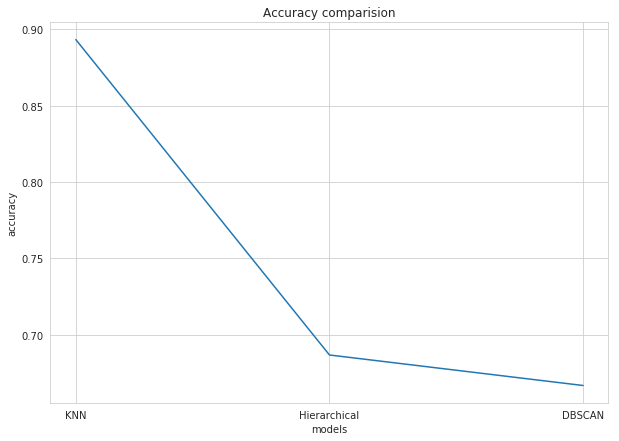

In [106]:
#plotting the graph to compare accuracy
print(accuracy)
plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("Accuracy comparision")
plt.plot(model,accuracy)


[0.8917748917748918, 0.5978265520044496, 0.5632183908045977]


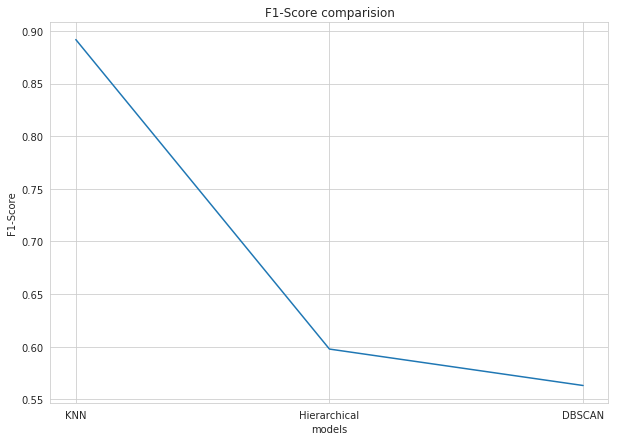

In [107]:
#plotting the graph to compare f1_score
print(f1_score)
plt.xlabel("models")
plt.ylabel("F1-Score")
plt.title("F1-Score comparision")
plt.plot(model,f1_score)